#**Data Mining Final Project**

**Date :** 04/10/2022



**Name:**

20I307 - Akshaya B

20I308 - Archana E

20I311 - Atheeithan Ta

20I318 - Hariharan C P

20I357 - Vinaya Balamurali Muneesh

**Description of dataset:** Future sales prediction.

**Aim :** To generate a model to predict future sales.

**Context:** This data set is created for the purpose predicting the sales of a certain item in a shop.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

#LSTM MODEL:

# New Section

In [ ]:
from datetime import datetime, date
from sklearn.preprocessing import StandardScaler
from math import ceil

In [ ]:
train = pd.read_csv('sales_train.csv')
test = pd.read_csv('test.csv')
submission = pd.read_csv('sample_submission.csv')
items = pd.read_csv('items.csv')
item_cats = pd.read_csv('item_categories.csv')
shops = pd.read_csv('shops.csv')

Preprocessing:

In [ ]:
for i in train:
  print(train[i].notnull().value_counts())
train=train.dropna()
for i in train:
  print(train[i].notnull().value_counts())

True    1224439
Name: date, dtype: int64
True    1224439
Name: date_block_num, dtype: int64
True    1224439
Name: shop_id, dtype: int64
True    1224439
Name: item_id, dtype: int64
True    1224439
Name: item_price, dtype: int64
True    1224439
Name: item_cnt_day, dtype: int64
True    1224439
Name: date, dtype: int64
True    1224439
Name: date_block_num, dtype: int64
True    1224439
Name: shop_id, dtype: int64
True    1224439
Name: item_id, dtype: int64
True    1224439
Name: item_price, dtype: int64
True    1224439
Name: item_cnt_day, dtype: int64


In [ ]:
train.reset_index().groupby(['item_id', 'date_block_num', 'shop_id']).mean()

Graph between date_block_num and intem_count:

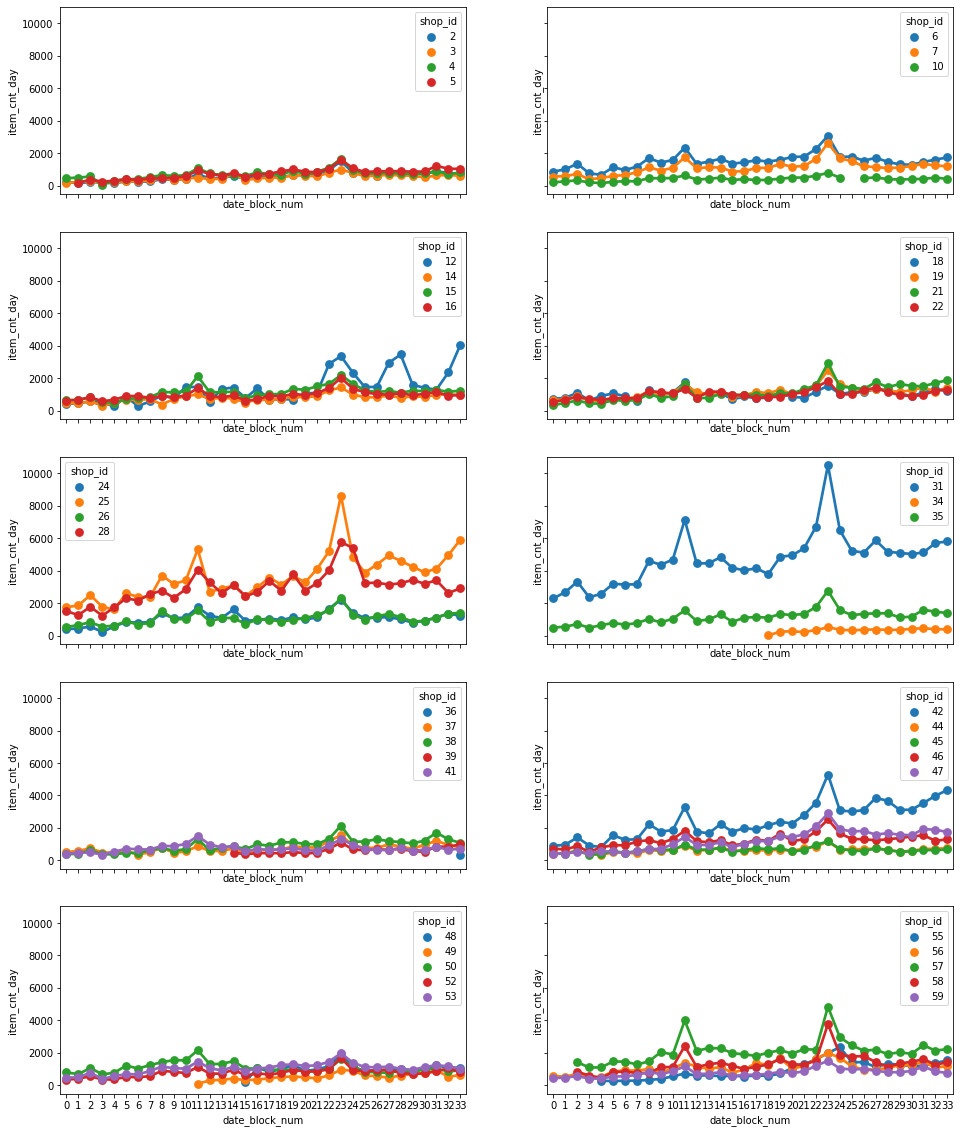

In [ ]:
# min([], default="EMPTY")
grouped = pd.DataFrame(train.groupby(['shop_id', 'date_block_num'])['item_cnt_day'].sum().reset_index())
fig, axes = plt.subplots(nrows=5, ncols=2, sharex=True, sharey=True, figsize=(16,20))
num_graph = 10
id_per_graph = ceil(grouped.shop_id.max() / num_graph)
count = 0
for i in range(5):
    for j in range(2):
        sns.pointplot(x='date_block_num', y='item_cnt_day', hue='shop_id', data=grouped[np.logical_and(count*id_per_graph <= grouped['shop_id'], grouped['shop_id'] < (count+1)*id_per_graph)], ax=axes[i][j])
        count += 1

In [ ]:
train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.0,1.0
10,03.01.2013,0,25,2574,399.0,2.0
11,05.01.2013,0,25,2574,399.0,1.0
12,07.01.2013,0,25,2574,399.0,1.0
13,08.01.2013,0,25,2574,399.0,2.0


In [ ]:
train = train.set_index('item_id').join(items.set_index('item_id'),lsuffix='_left', rsuffix='_right').drop('item_name', axis=1).reset_index()
train.head()

,item_id,date,date_block_num,shop_id,item_price,item_cnt_day,item_category_id
0,30,28.02.2013,1,50,399.0,1.0,40
1,30,26.02.2013,1,50,399.0,1.0,40
2,30,12.02.2013,1,50,399.0,1.0,40
3,30,14.02.2013,1,50,399.0,2.0,40
4,30,15.02.2013,1,50,399.0,3.0,40


Extracting month data from date:

In [ ]:
train['month'] = train.date.apply(lambda x: datetime.strptime(x, '%d.%m.%Y').strftime('%m'))
train['year'] = train.date.apply(lambda x: datetime.strptime(x, '%d.%m.%Y').strftime('%Y'))
train.head()

,item_id,date,date_block_num,shop_id,item_price,item_cnt_day,item_category_id,month,year
0,30,28.02.2013,1,50,399.0,1.0,40,02,2013
1,30,26.02.2013,1,50,399.0,1.0,40,02,2013
2,30,12.02.2013,1,50,399.0,1.0,40,02,2013
3,30,14.02.2013,1,50,399.0,2.0,40,02,2013
4,30,15.02.2013,1,50,399.0,3.0,40,02,2013


Graph between month and item_count:

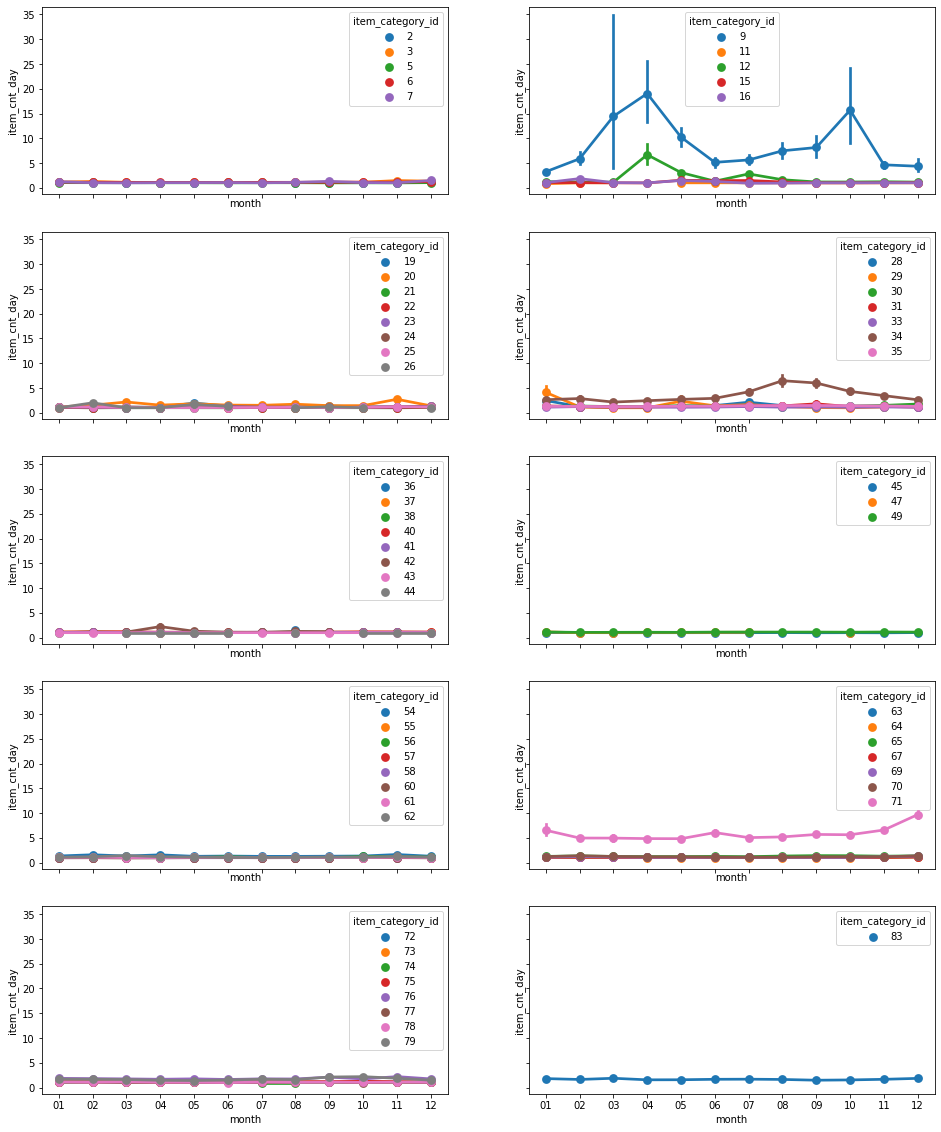

In [ ]:
fig, axes = plt.subplots(nrows=5, ncols=2, sharex=True, sharey=True, figsize=(16,20))
num_graph = 10
id_per_graph = ceil(train.item_category_id.max() / num_graph)
count = 0
for i in range(5):
    for j in range(2):
        sns.pointplot(x='month', y='item_cnt_day', hue='item_category_id',
                      data=train[np.logical_and(count*id_per_graph <= train['item_category_id'], train['item_category_id'] < (count+1)*id_per_graph)],
                      ax=axes[i][j])
        count += 1

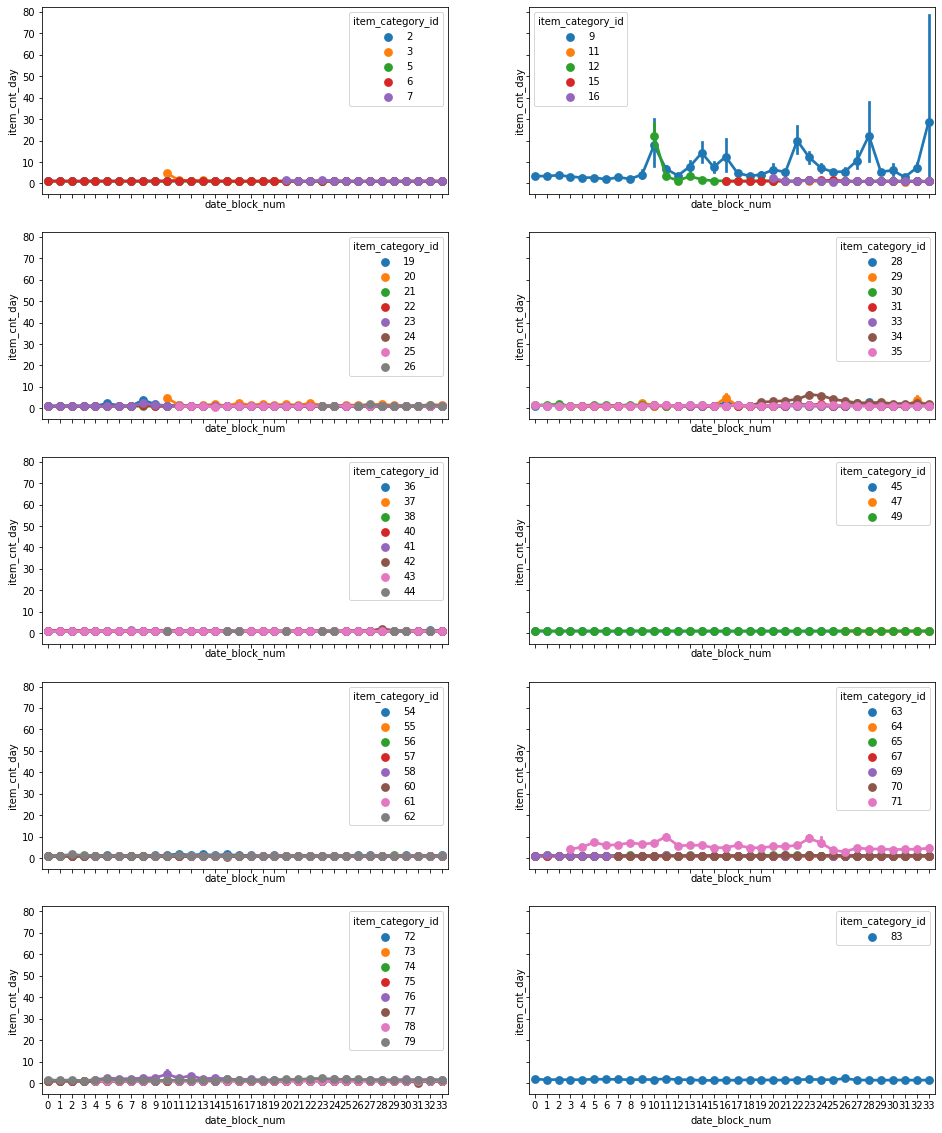

In [ ]:
fig, axes = plt.subplots(nrows=5, ncols=2, sharex=True, sharey=True, figsize=(16,20))
num_graph = 10
id_per_graph = ceil(train.item_category_id.max() / num_graph)
count = 0
for i in range(5):
    for j in range(2):
        sns.pointplot(x='date_block_num', y='item_cnt_day', hue='item_category_id',
                      data=train[np.logical_and(count*id_per_graph <= train['item_category_id'], train['item_category_id'] < (count+1)*id_per_graph)],
                      ax=axes[i][j])
        count += 1

Sort based on shopid and itemid:

In [ ]:
By using the LSTM modeltrain = train.drop('date', axis=1)
train = train.drop('item_category_id', axis=1)
train = train.groupby(['shop_id', 'item_id', 'date_block_num', 'month', 'year']).sum()
train = train.sort_index()
train

item_price  item_cnt_day
shop_id item_id date_block_num month year                          
2       30      2              03    2013       359.0           1.0
                5              06    2013       399.0           1.0
                15             04    2014       169.0           1.0
                16             05    2014       169.0           1.0
        31      1              02    2013      2796.0           4.0
...                                               ...           ...
59      22164   27             04    2015      1398.0           2.0
                30             07    2015       699.0           1.0
        22167   9              10    2013       299.0           1.0
                11             12    2013       598.0           2.0
                17             06    2014       299.0           1.0

[600159 rows x 2 columns]

#*LSTM MODEL:*

In [ ]:
sales_data = pd.read_csv('sales_train.csv')
item_cat = pd.read_csv('item_categories.csv')
items = pd.read_csv('items.csv')
shops = pd.read_csv('shops.csv')
sample_submission = pd.read_csv('sample_submission.csv')
test_data = pd.read_csv('test.csv')

*Preprocessing:*

In [ ]:
def basic_eda(df):
    print("----------TOP 5 RECORDS--------")
    print(df.head(5))
    print("----------INFO-----------------")
    print(df.info())
    print("----------Describe-------------")
    print(df.describe())
    print("----------Columns--------------")
    print(df.columns)
    print("----------Data Types-----------")
    print(df.dtypes)
    print("-------Missing Values----------")
    print(df.isnull().sum())
    print("-------NULL values-------------")
    print(df.isna().sum())
    print("-----Shape Of Data-------------")
    print(df.shape)

In [ ]:
print("=============================Sales Data=============================")
basic_eda(sales_data)
print()
print("=============================Test data=============================")
basic_eda(test_data)
print()
print("=============================Item Categories=============================")
basic_eda(item_cat)
print()
print("=============================Items=============================")
basic_eda(items)
print()
print("=============================Shops=============================")
basic_eda(shops)
print()
print("=============================Sample Submission=============================")
basic_eda(sample_submission)

=============================Sales Data=============================
----------TOP 5 RECORDS--------
         date  date_block_num  shop_id  item_id  item_price  item_cnt_day
0  02.01.2013               0       59    22154      999.00           1.0
1  03.01.2013               0       25     2552      899.00           1.0
2  05.01.2013               0       25     2552      899.00          -1.0
3  06.01.2013               0       25     2554     1709.05           1.0
4  15.01.2013               0       25     2555     1099.00           1.0
----------INFO-----------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Dtype  
---  ------          -----  
 0   date            object 
 1   date_block_num  int64  
 2   shop_id         int64  
 3   item_id         int64  
 4   item_price      float64
 5   item_cnt_day    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 134.4+ MB
None
----------

*Changing date time format:*

In [ ]:
sales_data['date'] = pd.to_datetime(sales_data['date'],format = '%d.%m.%Y')

*Creating a pivot table:*

In [ ]:
dataset = sales_data.pivot_table(index = ['shop_id','item_id'],values = ['item_cnt_day'],columns = ['date_block_num'],fill_value = 0,aggfunc='sum')

In [ ]:
dataset.reset_index(inplace = True)

In [ ]:
dataset.head()

shop_id item_id item_cnt_day                        ...        \
date_block_num                            0   1  2  3  4  5  6  7  ... 24 25   
0                    0      30            0  31  0  0  0  0  0  0  ...  0  0   
1                    0      31            0  11  0  0  0  0  0  0  ...  0  0   
2                    0      32            6  10  0  0  0  0  0  0  ...  0  0   
3                    0      33            3   3  0  0  0  0  0  0  ...  0  0   
4                    0      35            1  14  0  0  0  0  0  0  ...  0  0   

                                        
date_block_num 26 27 28 29 30 31 32 33  
0               0  0  0  0  0  0  0  0  
1               0  0  0  0  0  0  0  0  
2               0  0  0  0  0  0  0  0  
3               0  0  0  0  0  0  0  0  
4               0  0  0  0  0  0  0  0  

[5 rows x 36 columns]

In [ ]:
dataset = pd.merge(test_data,dataset,on = ['item_id','shop_id'],how = 'left')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (1 levels on the left,2 on the right)
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


*Filling NAN values with 0:*

In [ ]:
dataset.fillna(0,inplace = True)
dataset.head()

,ID,shop_id,item_id,"(item_cnt_day, 0)","(item_cnt_day, 1)","(item_cnt_day, 2)","(item_cnt_day, 3)","(item_cnt_day, 4)","(item_cnt_day, 5)","(item_cnt_day, 6)",...,"(item_cnt_day, 24)","(item_cnt_day, 25)","(item_cnt_day, 26)","(item_cnt_day, 27)","(item_cnt_day, 28)","(item_cnt_day, 29)","(item_cnt_day, 30)","(item_cnt_day, 31)","(item_cnt_day, 32)","(item_cnt_day, 33)"
0,0,5,5037,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,1.0,1.0,1.0,3.0,1.0,0.0
1,1,5,5320,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,5,5233,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,2.0,0.0,1.0,3.0,1.0
3,3,5,5232,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,4,5,5268,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
dataset.drop(['shop_id','item_id','ID'],inplace = True, axis = 1)
dataset.head()

,"(item_cnt_day, 0)","(item_cnt_day, 1)","(item_cnt_day, 2)","(item_cnt_day, 3)","(item_cnt_day, 4)","(item_cnt_day, 5)","(item_cnt_day, 6)","(item_cnt_day, 7)","(item_cnt_day, 8)","(item_cnt_day, 9)",...,"(item_cnt_day, 24)","(item_cnt_day, 25)","(item_cnt_day, 26)","(item_cnt_day, 27)","(item_cnt_day, 28)","(item_cnt_day, 29)","(item_cnt_day, 30)","(item_cnt_day, 31)","(item_cnt_day, 32)","(item_cnt_day, 33)"
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,1.0,1.0,1.0,3.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,2.0,0.0,1.0,3.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
X_train = np.expand_dims(dataset.values[:,:-1],axis = 2)
y_train = dataset.values[:,-1:]
X_test = np.expand_dims(dataset.values[:,1:],axis = 2)
print(X_train.shape,y_train.shape,X_test.shape)

(214200, 33, 1) (214200, 1) (214200, 33, 1)


In [ ]:
from keras.models import Sequential
from keras.layers import LSTM,Dense,Dropout

In [ ]:
my_model = Sequential()
my_model.add(LSTM(units = 64,input_shape = (33,1)))
my_model.add(Dropout(0.4))
my_model.add(Dense(1))

my_model.compile(loss = 'mse',optimizer = 'adam', metrics = ['mean_squared_error'])
my_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                16896     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 16,961
Trainable params: 16,961
Non-trainable params: 0
_________________________________________________________________


In [ ]:
my_model.fit(X_train,y_train,batch_size = 4096,epochs = 10)

Epoch 1/10
53/53 [==============================] - 24s 414ms/step - loss: 30.6684 - mean_squared_error: 30.6684
Epoch 2/10
53/53 [==============================] - 25s 474ms/step - loss: 30.2389 - mean_squared_error: 30.2389
Epoch 3/10
53/53 [==============================] - 27s 514ms/step - loss: 30.0799 - mean_squared_error: 30.0799
Epoch 4/10
53/53 [==============================] - 24s 458ms/step - loss: 29.9739 - mean_squared_error: 29.9739
Epoch 5/10
53/53 [==============================] - 22s 412ms/step - loss: 29.8117 - mean_squared_error: 29.8117
Epoch 6/10
53/53 [==============================] - 24s 445ms/step - loss: 29.7724 - mean_squared_error: 29.7724
Epoch 7/10
53/53 [==============================] - 26s 491ms/step - loss: 29.7732 - mean_squared_error: 29.7732
Epoch 8/10
53/53 [==============================] - 29s 535ms/step - loss: 29.6647 - mean_squared_error: 29.6647
Epoch 9/10
53/53 [==============================] - 24s 453ms/step - loss: 29.6363 - mean_square

In [ ]:
import tensorflow as tf
Mmodel = Sequential()
Mmodel.add(LSTM(units = 64,input_shape = (33,1)))
Mmodel.add(Dropout(0.4))
Mmodel.add(Dense(1))

Mmodel.compile(loss = 'mse',optimizer = 'adam', metrics = ['accuracy'])
history=Mmodel.fit(X_train,y_train,batch_size = 4096,epochs = 7)

Epoch 1/7
53/53 [==============================] - 28s 490ms/step - loss: 30.5524 - accuracy: 0.8476
Epoch 2/7
53/53 [==============================] - 25s 464ms/step - loss: 30.2056 - accuracy: 0.8491
Epoch 3/7
53/53 [==============================] - 29s 540ms/step - loss: 30.0067 - accuracy: 0.8493
Epoch 4/7
53/53 [==============================] - 28s 533ms/step - loss: 29.9283 - accuracy: 0.8496
Epoch 5/7
53/53 [==============================] - 29s 544ms/step - loss: 29.7726 - accuracy: 0.8485
Epoch 6/7
53/53 [==============================] - 29s 551ms/step - loss: 29.7410 - accuracy: 0.8491
Epoch 7/7
53/53 [==============================] - 27s 511ms/step - loss: 29.6862 - accuracy: 0.8496


In [ ]:
history.history['accuracy'][6]*100

84.95798110961914

In [ ]:
submission_pfs = my_model.predict(X_test)
submission_pfs = submission_pfs.clip(0,20)
# submission_pfs.head()
submission = pd.DataFrame({'ID':test_data['ID'],'item_cnt_month':submission_pfs.ravel()})
submission.to_csv('sub_pfs.csv',index = False)

6694/6694 [==============================] - 33s 5ms/step


In [ ]:
sub=pd.read_csv('sub_pfs.csv')
sub.head()

,ID,item_cnt_month
0,0,0.427221
1,1,0.118971
2,2,0.776191
3,3,0.169758
4,4,0.118971


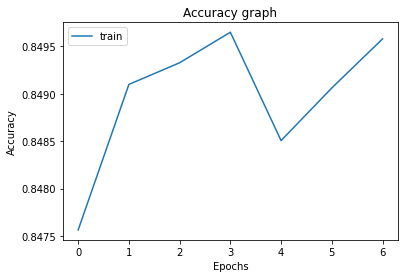

In [ ]:
plt.plot(history.history['accuracy'])
# plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Accuracy graph')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train'],loc='upper left')
plt.show()

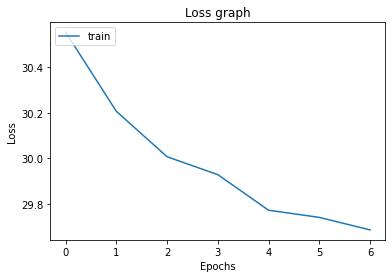

In [ ]:
plt.plot(history.history['loss'])
# plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Loss graph')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['train'],loc='upper left')
plt.show()

#**PCA:**

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
sales_train=pd.read_csv('sales_train.csv')
sample_submission=pd.read_csv('sample_submission.csv')
shops=pd.read_csv('shops.csv')
items_tr=pd.read_csv('items.csv')
item_categories=pd.read_csv('item_categories.csv')

In [ ]:
sales_train=sales_train.copy()

In [ ]:
sales_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Dtype  
---  ------          -----  
 0   date            object 
 1   date_block_num  int64  
 2   shop_id         int64  
 3   item_id         int64  
 4   item_price      float64
 5   item_cnt_day    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 134.4+ MB


In [ ]:
sales_train.describe(include='object')

,date
count,2935849
unique,1034
top,28.12.2013
freq,9434


In [ ]:
sales_train.duplicated().sum()

6

In [ ]:
sales_train=sales_train.drop_duplicates()

In [ ]:
sales_train.describe().T

,count,mean,std,min,25%,50%,75%,max
date_block_num,2935843.0,14.569913,9.422992,0.0,7.0,14.0,23.0,33.0
shop_id,2935843.0,33.001713,16.226976,0.0,22.0,31.0,47.0,59.0
item_id,2935843.0,10197.229013,6324.292703,0.0,4476.0,9343.0,15684.0,22169.0
item_price,2935843.0,890.853472,1729.801324,-1.0,249.0,399.0,999.0,307980.0
item_cnt_day,2935843.0,1.242641,2.618837,-22.0,1.0,1.0,1.0,2169.0


In [ ]:
DATA_corr=sales_train.corr()

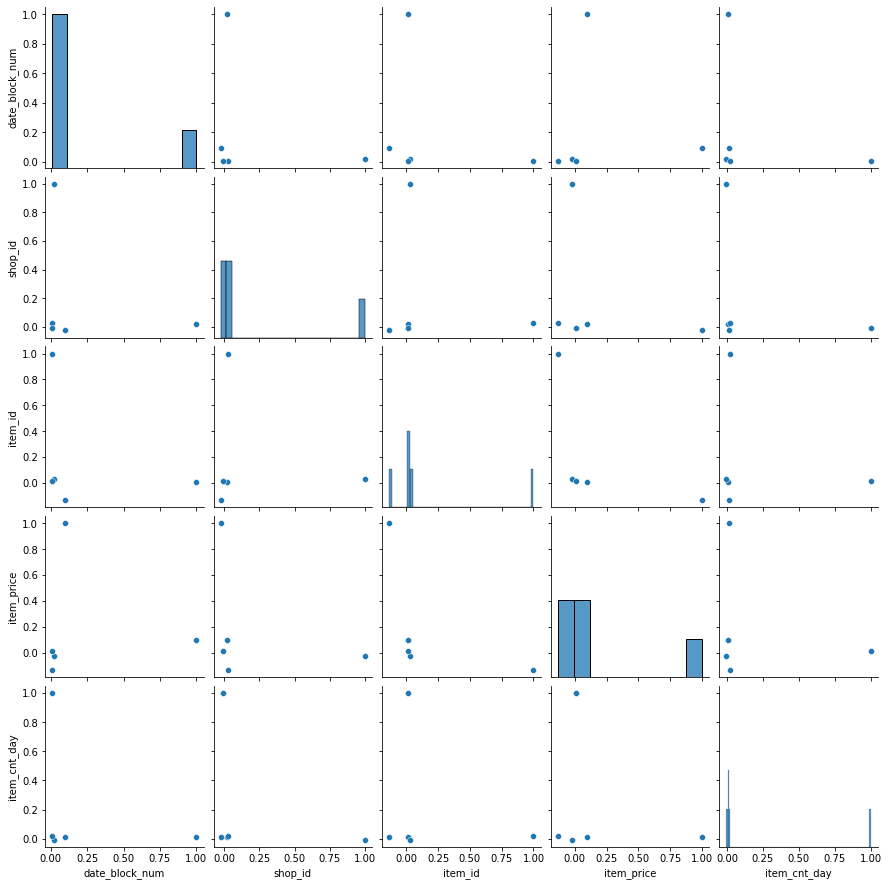

In [ ]:
import seaborn as sns
sns.pairplot(DATA_corr)

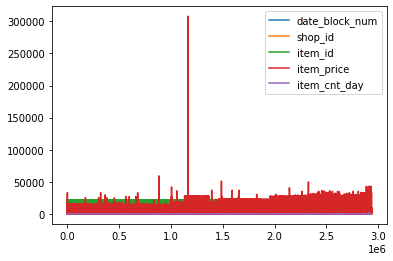

In [ ]:
sales_train.plot()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


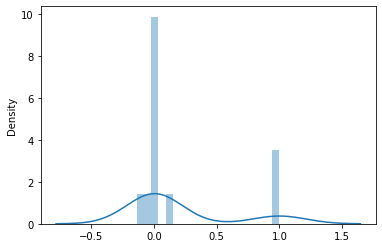

In [ ]:
sns.distplot(DATA_corr)

In [ ]:
sales_train.columns

Index(['date', 'date_block_num', 'shop_id', 'item_id', 'item_price',
       'item_cnt_day'],
      dtype='object')

In [ ]:
feature=['item_id','shop_id']
y=sales_train['item_price']
x=sales_train[feature]
y

0           999.00
1           899.00
2           899.00
3          1709.05
4          1099.00
            ...   
2935844     299.00
2935845     299.00
2935846     349.00
2935847     299.00
2935848     299.00
Name: item_price, Length: 2935843, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=33)

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
mm=LinearRegression(n_jobs=44)

In [ ]:
mm.fit(x_train,y_train)

LinearRegression(n_jobs=44)

In [ ]:
y_pre=mm.predict(x_test)
# y_pre.clip(0,20)
y_pre

array([1200.52716546,  923.68853066,  583.33800271, ..., 1016.05953009,
        731.16934514, 1092.05306573])

In [ ]:
from sklearn.metrics import classification_report,mean_absolute_error,accuracy_score

In [ ]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pre))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pre))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pre)))
print( " Accuracy ", metrics.r2_score(y_test, y_pre) )

Mean Absolute Error: 735.3497277947628
Mean Squared Error: 2872521.679413493
Root Mean Squared Error: 1694.8515213473695
 Accuracy  0.018807791349737535


In [ ]:
mean_absolute_error(y_test,y_pre)

735.3497277947628

In [ ]:
from sklearn.model_selection import cross_validate

In [ ]:
cross_validate(mm,x,y,cv=5,n_jobs=12)

{'fit_time': array([1.21934342, 1.15350175, 0.79387021, 0.70794559, 0.86362863]),
 'score_time': array([0.0529213 , 0.04648113, 0.01589775, 0.02079082, 0.02024508]),
 'test_score': array([-0.0479783 ,  0.00127016,  0.02208932, -0.00029924,  0.00839587])}

In [ ]:
testing=pd.read_csv('test.csv')
testing.head()

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


In [ ]:
testing=testing.drop('ID',axis=1)

In [ ]:
oo=mm.predict(testing)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


In [ ]:
testing['ppp']=oo*-1

In [ ]:
testing

,shop_id,item_id,ppp
0,5,5037,9403.989021
1,5,5320,10007.309157
2,5,5233,9821.836182
3,5,5232,9819.704309
4,5,5268,9896.451747
...,...,...,...
214195,45,18454,38008.793219
214196,45,16188,33177.968384
214197,45,15757,32259.131004
214198,45,19648,40554.249906


**Result:** Hence a model has been generated and trained to predict the future sales successfully.